#  SOQCS Example 6: Simulation of a delay in the middle of a circuit.

<p style='text-align: justify;'> We consider a circuit made of two ideal balanced beamsplitters with two photons of exponential shape in each of the input channels as a theoretical representation of the two photons interference experiment reported in ref.[1]. We consider a delay dt in one of the channels between the two beamsplitters and we print the probability of these two photons to be measured at different times in the circuit output.  In this case we configure an ideal detector and circuit therefore the result only depends on the photon distinguishability. </p>
<br>
<br>
[1] Santori, C., Fattal, D., Vučković, J. et al. <i>Indistinguishable photons from a single-photon device.</i> <b> Nature 419, 594:597</b> (2002)

<div>
<img src="./image/live6_device.png" width="500"/>
</div>
<p style='text-align: center;'> <b>Experiment device as described in fig. 3a of ref. [1] </b></p>

<div>
<img src="./image/live6_circuit.png" width="700"/>
</div>
<p style='text-align: center;'> <b>Simulated circuit </b></p>

In [1]:
import soqcs        # Import SOQCS
import numpy as np  # Import numpy
import math         # Impart math

Set up simulation constants

In [2]:
# Simulation constants  #
N   =  50   # Number of points
dtm = 9.0   # Period to be sweeped.

<p style='text-align: justify;'> Next can be bound a piece of code to calculate the probability of two indistinguishable photons to arrive at different times to two detectors when a delay is introduced between two beamsplitters. To do that we add two "phantom" photons to the circuit. This is, we initialize the channels zero and one to zero photons at the particular times of interest. Even if no photons are added the packets described by that definition are created in the simulation. This packets are used to calculate p(dt=t2-t1)</p>

<p style='text-align: justify;'> To use a delay we divide the simulation in four periods of time of 3 time units width. The first one goes from -1.5 to 1.5 time units. A delay will add a fix amount of nx3 time units of delay where
n is as parameters. Multiple delays can be defined in a circuit but their delay times have to be equal or multiples of the smaller. </p>

<p style='text-align: justify;'>  <b>Note: </b> This is not the most
efficient implementation.  All the objects have to be recreated for each point calculation. This code is implemented for demonstration purposes therefore it is intended to be simple. </p>

In [3]:
# Imnintalize variables
delta=dtm/(N-1)
sim=soqcs.simulator(1000)
prob=np.zeros(N) 
t1=0.0002
# Main loop
for i in range(0,N):
    t2=0;
    for j in range(0,N):
        example = soqcs.qodev(nph=2,      # Number of photons  
                              nch=2,      # Number of channels
                              nm=1,       # Number of polarizations
                              ns=4,       # Number of packets
                              np=4,       # Number of periods
                              dtp=3.0,    # Period width
                              clock=3,    # Detectors have a clock. (Manual mode. We don't want SOQCS to rearrange the packets)
                                          # Advanced feature. (The user must define the needed packets manually)
                              R=0,        # Number of iterations to calculate detector effects.
                              loss=False, # Calculation of losses = False
                              ckind='E')  # Use exponential shaped wavefunctions
        # Add photons with exponential wavefunctions 
        # at time t, frequency f and characteristic decay time
        p2=example.add_photons(0, 0, t= t2, f = 1.0, w = 0.01);
        p1=example.add_photons(0, 1, t= t1, f = 1.0, w = 0.01);
        example.add_photons( 1, 0, t=0.001, f = 1.0, w = 0.3);
        example.add_photons( 1, 1, t= 3.011,f = 1.0, w = 0.3);
        # Circuit
        example.beamsplitter(0,1,45.0,0.0);
        example.delay(1);
        example.beamsplitter(0,1,45.0,0.0);
        # Detectors
        example.detector(0);
        example.detector(1);

        # Run simulator
        measured=sim.run(example)

        # Calcualte probability for each bin
        dt=t1-t2;
        term=[[0 , 1 ],
              [0 , 0 ],
              [p1, p2],
              [1 , 1 ]]

        k=math.floor(dt/delta);
        if(k>0): 
            prob[k]=prob[k]+measured.prob(term,example);
        
        # Advance time
        t2=t2+delta
    # Advance time
    t1=t1+delta


Normalization of the output

In [4]:
# Normalization
norm=0.0
time=np.zeros(N) 
for k in range(0,N):
    norm=max(norm,prob[k])
    time[k]=k*delta
    
for k in range(0,N):
    prob[k]=prob[k]/norm

Here we plot the probability as function of delay time dt.

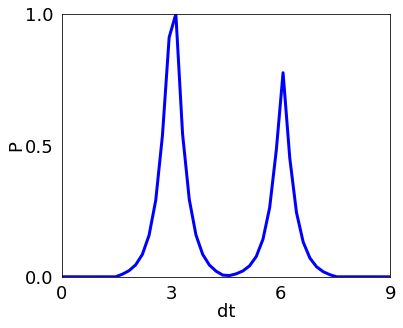

In [5]:
# Print on screen
soqcs.plot_data([prob],time, 6, 5,'dt', 0, dtm, 4, 'P', 0.0 , 1.0, 3, 11,['b'])


**THIS CODE IS PART OF SOQCS** <br>

**Copyright:** <br>
Copyright © 2023 National University of Ireland Maynooth, Maynooth University. All rights reserved.
The contents and use of this document and the related code are subject to the licence terms detailed in <a href="./assets/LICENCE.TXT">LICENCE.txt</a>